# Mathematical Underpinnings - Lab 4

In [71]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde, pearsonr
from sklearn.feature_selection import mutual_info_classif
import seaborn as sns
import pandas as pd
rng = np.random.default_rng()

## Task 1

### a)

#### bp 1)

In [2]:
# a heatmap
# you may use pcolormesh function and draw a heatmap for a sample
# or draw a heatmap for a teoretic density function

# I give you an answer to that task, because it may take too much time to do it during labs. 

In [3]:
def plot_xyz(data_2d, nbins=300):
    x = data_2d[:,0]
    y = data_2d[:,1]
    k = gaussian_kde([x, y])
    xi, yi = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j]
    zi = k(np.vstack([xi.flatten(), yi.flatten()]))
    return xi, yi, zi

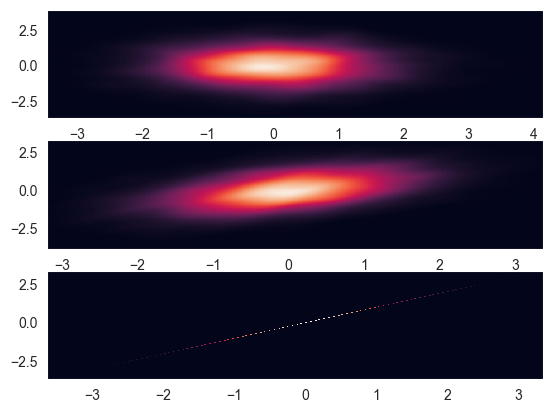

In [5]:
fig, axs = plt.subplots(3)

n = 5000

data_2d00 = np.random.multivariate_normal(np.zeros(2), np.array([[1, 0], [0, 1]]), n)
xi_0, yi_0, zi_0 = plot_xyz(data_2d00)
data_2d05 = np.random.multivariate_normal(np.zeros(2), np.array([[1, 0.5], [0.5, 1]]), n)
xi_1, yi_1, zi_1 = plot_xyz(data_2d05)
data_2d10 = np.random.multivariate_normal(np.zeros(2), np.array([[1, 1], [1, 1]]), n)
xi_2, yi_2, zi_2 = plot_xyz(data_2d10)
 
# Make the plot
axs[0].pcolormesh(xi_0, yi_0, zi_0.reshape(xi_0.shape), shading='auto')
axs[1].pcolormesh(xi_1, yi_1, zi_1.reshape(xi_1.shape), shading='auto')
axs[2].pcolormesh(xi_2, yi_2, zi_2.reshape(xi_2.shape), shading='auto')
plt.show()

#### bp 2)

In [8]:
from sklearn.metrics import mutual_info_score

discretize = lambda x: np.digitize(x, np.histogram_bin_edges(x, bins=10))

def get_corels(ro, n = 5000):
    data = rng.multivariate_normal(np.zeros(2), np.array([[1, ro], [ro, 1]]), n)
    X_disc = discretize(data[:,0])
    Y_disc = discretize(data[:,1])
    pearson = pearsonr(data[:,0], data[:,1])[0]
    mi = mutual_info_score(X_disc, Y_disc)
    return pearson, mi
data_2d00 = rng.multivariate_normal(np.zeros(2), np.array([[1, 0], [0, 1]]), n)
data_2d05 = rng.multivariate_normal(np.zeros(2), np.array([[1, 0.5], [0.5, 1]]), n)
data_2d10 = rng.multivariate_normal(np.zeros(2), np.array([[1, 1], [1, 1]]), n)

In [9]:
get_corels(0), get_corels(0.5), get_corels(1)

((0.007331476404740875, 0.007298650194682635),
 (0.503481582138724, 0.14171112342955147),
 (1.0, 1.725740852309244))

#### bp 3)

In [33]:
N = 100
results_pr = []
results_mi = []
params = [-1, -0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75, 1]
for i in range(N):
    vals = [get_corels(i) for i in params]
    results_pr.extend([x[0] for x in vals])
    results_mi.extend([x[1] for x in vals])
result_pr = pd.DataFrame({'value':results_pr, 'param':params*N})
result_mi = pd.DataFrame({'value':results_mi, 'param':params*N})

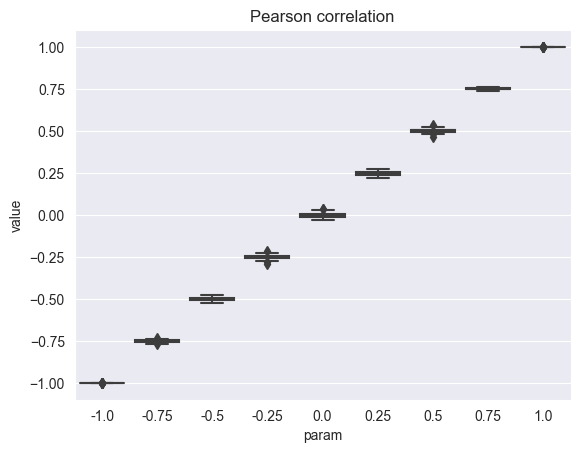

In [34]:
sns.boxplot(result_pr, y='value', x='param')
plt.title('Pearson correlation')
plt.show()

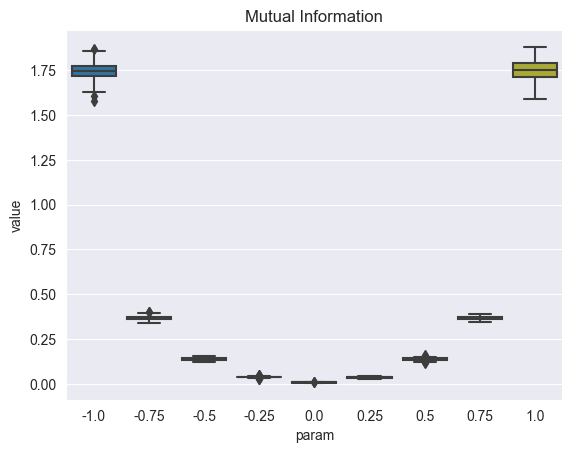

In [35]:
sns.boxplot(result_mi, y='value', x='param')
plt.title('Mutual Information')
plt.show()

#### bp 4)

A hint: note that mutual information between two correlated normal distributions i.e. when $(X, Y)\sim \mathcal{N}((0,0)', \Sigma)$ and
$$\Sigma = \begin{pmatrix}
        \sigma_x^2 & \rho \\ \rho & \sigma_y^2
    \end{pmatrix}$$
equals
$$I(X,Y) = \frac{1}{2}\log \left(\frac{\sigma_x^2\sigma_y^2}{\sigma_x^2\sigma_y^2 - \rho^2}\right).$$

C:\Users\Mati\anaconda3\envs\AML\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


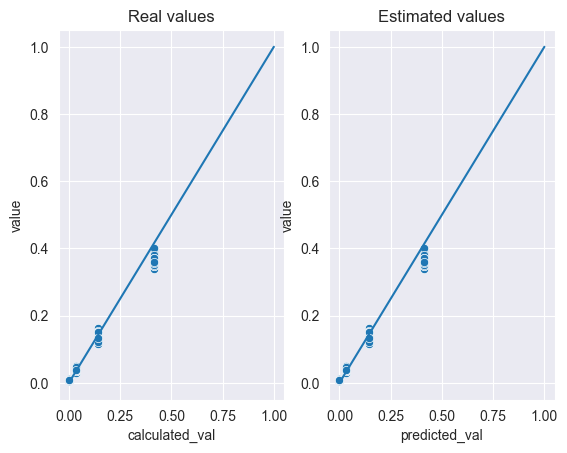

In [45]:
result_mi["calculated_val"] = -np.log(1-result_mi["param"]**2)/2
result_mi["predicted_val"] = -np.log(1-result_pr["value"]**2)/2
result_mi["predicted_val"] = -np.log(1-result_mi["param"]**2)/2

fig, ax = plt.subplots(ncols=2)

sns.scatterplot(data = result_mi, x = "calculated_val", y = "value", ax = ax[0])
sns.scatterplot(data = result_mi, x = "predicted_val", y = "value", ax = ax[1])

x = np.linspace(0, 1, 100)
ax[0].plot(x, x)
ax[0].set_title("Real values")
ax[1].plot(x, x)
ax[1].set_title("Estimated values")
plt.show()

### b)

#### bp 1)

In [ ]:
# again: this is too time consuming so here is an answer

In [ ]:
fig, axs = plt.subplots(3)

n = 1000
x = rng.normal(0, 1, n)

data_2d = np.array([x, x**2 + rng.normal(0, 0, n)]).T
xi_0, yi_0, zi_0 = plot_xyz(data_2d)
data_2d = np.array([x, x**2 + rng.normal(0, 0.5, n)]).T
xi_1, yi_1, zi_1 = plot_xyz(data_2d)
data_2d = np.array([x, x**2 + rng.normal(0, 2, n)]).T
xi_2, yi_2, zi_2 = plot_xyz(data_2d)
 
# Make the plot
axs[0].pcolormesh(xi_0, yi_0, zi_0.reshape(xi_0.shape), shading='auto')
axs[1].pcolormesh(xi_1, yi_1, zi_1.reshape(xi_1.shape), shading='auto')
axs[2].pcolormesh(xi_2, yi_2, zi_2.reshape(xi_2.shape), shading='auto')
plt.show()

#### bp 2) and 3)

In [65]:
def get_corels2(sigma, n = 1000):
    x = rng.normal(0, 1, n)
    data = np.array([x, x**2 + rng.normal(0, sigma, n)]).T
    X_disc = discretize(data[:,0])
    Y_disc = discretize(data[:,1])
    pearson = pearsonr(data[:,0], data[:,1])[0]
    mi = mutual_info_score(X_disc, Y_disc)
    return pearson, mi

N = 100
sigmas = [i/10 for i in range(11)]

results_pearson2 = []
results_mi2 = []
pms = []
for sigma in sigmas:
    for i in range(N):
        vals = get_corels2(sigma)
        results_pearson2.append(vals[0])
        results_mi2.append(vals[1])
    pms.extend([sigma, sigma]*N)
result = pd.DataFrame({"values":results_pearson2+results_mi2, "type":['Pearson']*N*len(sigmas)+['Mi']*N*len(sigmas), "param":pms})

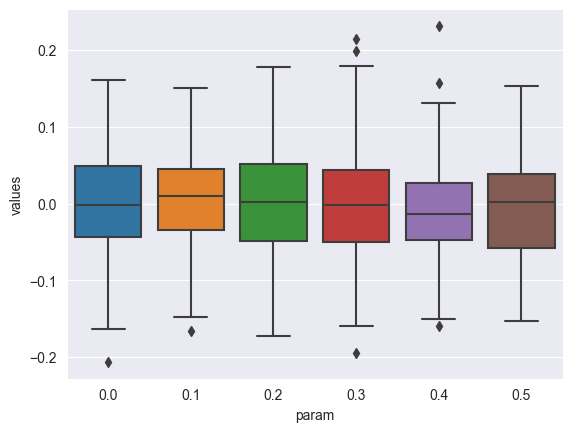

In [66]:
sns.boxplot(result[result['type']=='Pearson'], x="param", y="values")
plt.show()

## Task 2

### a)

In [78]:
def asymptotic_independence(X, Y, statistic, bins = 10):
    disc_X = np.digitize(X, np.histogram_bin_edges(X, bins=bins))
    disc_Y = np.digitize(Y, np.histogram_bin_edges(Y, bins=bins))
    freedom = (len(np.unique(disc_X))-1)* (len(np.unique(disc_Y))-1)

    hist = np.histogram2d(disc_X, disc_Y, bins = bins)[0]
    stat, val = None, None
    if statistic == "mi":
        mi = mutual_info_score(disc_X, disc_Y)
        stat = 2*len(X)*mi
        val = 1 - chi2.cdf(2*len(X)*mi, freedom)
    elif statistic == "pearson":
        stat = chi2_contingency(hist)[0]
        val = 1 - chi2.cdf(stat, freedom)
    return stat, val

### b)

In [120]:
def permutation_independence(X, Y, permut=500):
    disc_X = np.digitize(X, np.histogram_bin_edges(X, bins=10))
    disc_Y = np.digitize(Y, np.histogram_bin_edges(Y, bins=10))
    observed = mutual_info_score(disc_X, disc_Y)
    results = []
    for i in range(permut):
        rng.shuffle(disc_X)
        mi = mutual_info_score(disc_X, disc_Y)
        results.append(mi)
    return observed, (1 + np.sum(results >= observed))/(1+permut)

### c)

**Independent r.v.**

A hint: two discretized independent normal random variables (or any two independent discrete r.v.)

In [121]:
# independent r.v. - we expect that our tests don't reject the null hypothesis
N = 5000
X = rng.normal(0, 1, N)
Y = rng.normal(0, 1, N)
asymptotic_independence(X, Y, "pearson")

(123.34513660890791, 0.056633249874805336)

In [122]:
asymptotic_independence(X, Y, "mi")

(84.02299002100294, 0.874599541121597)

In [123]:
permutation_independence(X, Y)

(0.008402299002100294, 0.2874251497005988)

**Dependent r.v.**

A hint: two discretized dependent normal random variables (or two categorical wuch that we enforce $X=Y$ for a subset of observations)

In [124]:
# independent r.v. - ideally we will reject the null hypothesis
X = rng.normal(0, 1, N)
Y = np.hstack([X[:N//2], rng.normal(1, 1, N-N//2)])
asymptotic_independence(X, Y, "pearson")

(6531.027846288517, 0.0)

In [125]:
asymptotic_independence(X, Y, "mi")

(3612.96664147873, 0.0)

In [126]:
permutation_independence(X, Y)

(0.361296664147873, 0.001996007984031936)